# Ising Model - 2D using Importance Sampling

First of all we import the required libraries:

Date - Oct -9-2015

In [ ]:
import matplotlib.pyplot as plt
import math as math
import random as random
import pylab as pylab
import numpy as np

### Global parameters

Then we set some global variables:

In [51]:
Kb = 1.0
JJ = 1.0

### Cold Start and Hot Start

Before begining simulation, if we select all spin up or all spin down then it is called cold configuration.

In [3]:
def cold_start(L):
    U = [[1.0 for k in range(L)]for l in range(L)]
    return U
    

We can make a plot of this cold configuration by the help of Uplotter :

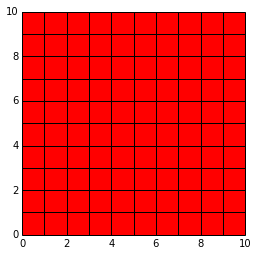

In [6]:
CU = cold_start(10)
Uplotter(CU)

 if we select spin randomly up or down then it is called cold configuration

In [7]:
def hot_start(L): 
      U = [[0.0 for i in range(L)]for j in range(L)]
      for i in range(L):
          for j in range(L):
              t = random.sample([-1,1],1)
              U[i][j] = t[0]  
      return U 

Similarly we can plot thishot configuration as well.

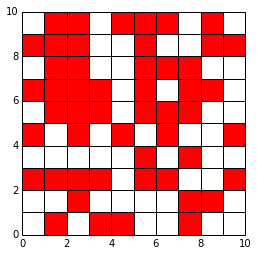

In [14]:
HU = hot_start(10)
Uplotter(HU)

### Hamiltonian

Hamiltonian of  L by L lattice is given by

$H = - J \sum_{i\neq j} S_{i}S_{j}$

In [62]:
def Hamiltonian(U):
      H = 0.0
      L = len(U)
      for i in range(L):
          for j in range(L):
                
              ni = 0;nj =0;
              if i == 0: ni = L
              if j == 0: nj = L
           
              H = H -  0.5*JJ*U[i][j]*(U[i][(j-1)+nj] \
                        + U[(i+1)%L][j] \
                        + U[i][(j+1)%L] \
                        + U[(i-1)+ni][j])   
      return H

One can check what are hamiltonian for hot and cold start:

In [16]:
Hamiltonian(CU)

-200.0

In [17]:
Hamiltonian(HU)

12.0

### Mangnetization

One can calculate magnetization by simply taking average over all spins:

In [63]:
def magnetization(U):
     m = 0.0
     L = len(U)
     for i in range(L):
          for j in range(L):
              m = m + U[i][j]
     m = m/float(L*L)           
     return m
        

In [19]:
magnetization(HU)

0.02

In [20]:
magnetization(CU)

1.0

### Spin Flipper

In [21]:
def ld(k,L):
    if k == 0:
        return L
    else: return 0

In [87]:
def spin_flipper(U,printkey):
        L = len(U)
        
        i = random.randint(0, L-1) 
        j = random.randint(0, L-1)
       
        if printkey ==1:print "flipped at", i,j
            
        U[i][j] = -U[i][j]
       
           
        dH =  -2.0*JJ*U[i][j]*(U[i][(j-1)+ld(j,L)] \
                            + U[(i+1)%L][j] \
                            + U[i][(j+1)%L] \
                            + U[(i-1)+ld(i,L)][j])      
        
        return U,dH,i,j 

### Thermalization

In [110]:
def Thermalization(U,T,nrun,printkey) :
        M = [0.0 for k in range(nrun)]
        irun = 0       
       
       
        while irun < nrun:
                    V = U
                    w = magnetization(U)
                    
                    U,dH,p,q = spin_flipper(U,printkey)
                   
                   
                    if dH < 0:
                        
                        if printkey ==1: print irun, "E decreased! You are accepted !",dH
                            
                        M[irun] = magnetization(U)
                       
                    else:
                        
                       if printkey ==1:print irun, "E increased!",dH
                            
                       frac = math.exp(-dH/(Kb*T))
                       b = random.uniform(0.0,1.0)
                            
                       if printkey ==1:print "frac =",frac,"b=",b,"dH = ",dH
                                
                       if  b < frac:
                                    
                            if printkey ==1:print irun, " You Lucky!"
                                
                            M[irun] = magnetization(U)
                             
                       else:
                            if printkey ==1: print irun, "Loser!"
                            if printkey ==1: print "spin restablished at",p,q
                            U[p][q] = -U[p][q]
                            M[irun] = w 
                           
                            
                    for i in range(L):
                        for j in range(L):
                            if U[i][j] != V[i][i]:
                                 if printkey ==1: print"Warning!spin is changed!", i,j 
                            
                    
                    
                    
                    if printkey ==2 : print irun, M[irun]   
                    irun = irun +1
        return M,U

Lets print out some measurements of m

In [112]:
nrun = 100
T = 1.0
L = 10
U = cold_start(L)  
M,U = Thermalization(U,T,nrun, 1)

flipped at 2 6
0 E increased! 8.0
frac = 0.000335462627903 b= 0.200945442416 dH =  8.0
0 Loser!
spin restablished at 2 6
flipped at 5 3
1 E increased! 8.0
frac = 0.000335462627903 b= 0.208228177318 dH =  8.0
1 Loser!
spin restablished at 5 3
flipped at 3 9
2 E increased! 8.0
frac = 0.000335462627903 b= 0.518140057869 dH =  8.0
2 Loser!
spin restablished at 3 9
flipped at 7 2
3 E increased! 8.0
frac = 0.000335462627903 b= 0.453525585218 dH =  8.0
3 Loser!
spin restablished at 7 2
flipped at 4 2
4 E increased! 8.0
frac = 0.000335462627903 b= 0.301315970059 dH =  8.0
4 Loser!
spin restablished at 4 2
flipped at 1 1
5 E increased! 8.0
frac = 0.000335462627903 b= 0.559871016385 dH =  8.0
5 Loser!
spin restablished at 1 1
flipped at 3 7
6 E increased! 8.0
frac = 0.000335462627903 b= 0.364710311714 dH =  8.0
6 Loser!
spin restablished at 3 7
flipped at 4 9
7 E increased! 8.0
frac = 0.000335462627903 b= 0.589989052706 dH =  8.0
7 Loser!
spin restablished at 4 9
flipped at 5 7
8 E increased! 8.

### Mplotter

In [98]:
def thrmal_plotter(M,nrun) :
        X = np.arange(0,len(M),1)
        plt.figure(1)
        plt.grid()
        plt.plot(X,M,"-")
        plt.axis([0,nrun,-1.2,1.2])
        plt.show()     
            
        return         

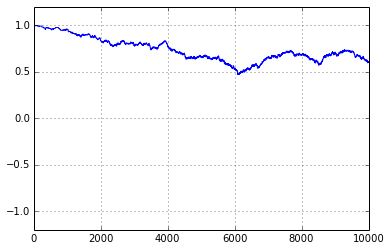

In [125]:
L = 20
nrun = 10000
T = 2.4
U = cold_start(L) 
M,U = Thermalization(U,T,nrun, 0)
thrmal_plotter(M,nrun)
#Uplotter(U)

We can plot both run with hot and cold start together:

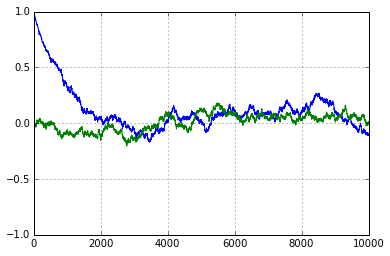

In [127]:
L =20
nrun = 10000
T = 5.0
U1 = cold_start(L) 
U2 = hot_start(L)
M1,U1 = Thermalization(U1,T,nrun,0)
M2,U2 = Thermalization(U2,T,nrun,0)
X = np.arange(0,len(M1),1)

plt.figure(1)
plt.grid()
plt.plot(X,M1,"-")
plt.plot(X,M2,"-")
plt.axis([0,nrun,-1,1])
plt.show()


### Phase Transition

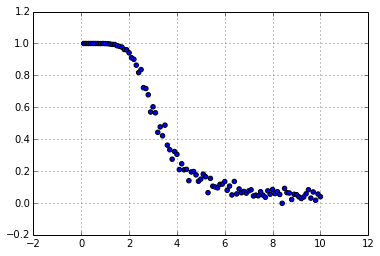

In [132]:
L = 32
nrun = 10000
Tn = 100
avm = []
KT = []
for t in range(1,Tn+1):
        T = 0.1*t
        KT.append(T)
        U = cold_start(L)
        M,U = Thermalization(U,T,nrun,0)
        nM = M[1000:nrun-1]
        avm.append(np.mean(nM))
       
 
plt.figure()
plt.scatter(KT,avm)
#plt.axis([0,1,-1,1])
plt.grid()
plt.show() 



### Uplotter

In [5]:
def Uplotter(List):
    
        '''List = List to be plotted
           dim = dimension of matrix
           tics = x and y tics applied'''
        dim = len(List[0])
        tics = 1
        tt = 1.0
        s_map = [(float(p),float(q)) for p in range(dim) for q in range(dim)]
        site = 0
        for p in range(dim):
             for q in range(dim):
               if List[p][q] == -1 :
                  rtgl = pylab.Rectangle(s_map[site], tt,tt, fc='white')
                  pylab.gca().add_patch(rtgl)
               if List[p][q] == 1 :
                  rtgl = pylab.Rectangle(s_map[site], tt,tt, fc='red')
                  pylab.gca().add_patch(rtgl)
               site = site+1
    
    
        Dx = float(dim) 
        Dy = float(dim)
        pylab.axis('scaled')
        pylab.axis([0.0,Dx,0.0,Dy])
        #pylab.xticks([(tics)*k for k in range(int(dim/tics))])
        #pylab.yticks([(tics)*k for k in range(int(dim/tics))])
        pylab.show()
        return   
         